# 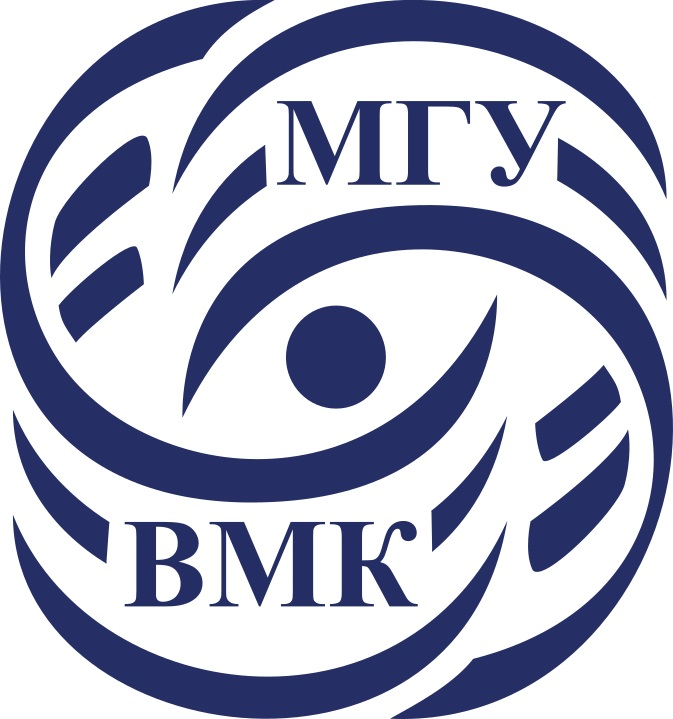

# Машинное обучение. ВМК МГУ

## Практическое задание 5: Линейные модели, часть 2: Классификация

### Важно! О формате сдачи

* Практически все задания в этой части оцениваются по системе <font color='red'>кросс-рецензирования.</font>
* Задания, в котором надо <font color='red'>реализовывать свой код</font> и послать в систему, выделены здесь и в pdf отдельно
* В этом ноутбуке есть задание на <font color='red'>unit-тестирование</font>
* При решении ноутбука <font color='red'>используйте данный шаблон.</font> Не нужно удалять текстовые ячейки c разметкой частей ноутбука и формулировками заданий. Добавлять свои ячейки, при необходимости, конечно можно
* Везде, где в формулировке задания есть <font color='red'>какой-либо вопрос (или просьба вывода)</font>, необходимо прописать ответ в ячейку (код или markdown).
* Наличие <font color='red'>кода решения обязательно.</font> Письменные ответы на вопросы без сопутствующего кода оцениваются в 0 баллов.
* Если в ячейке написана фраза <font color='red'>"Вывод"/"Ответ на вопрос" итд</font>, то ожидается ответ в виде текста (можете добавить ячейки с кодом, если считаете это необходимым, но это необязательно). Если в ячейке написано <font color='red'>"Your code here" и пр. </font>, то ожидается ответ в виде кода (можете добавить ячейки с кодом, если считаете это необходимым, но это необязательно). Если есть и ячейка с фразой "Вывод", и ячейка с фразой "Your code here", то в ответе ожидается и код, и текст

Цель данного задания:

* Узнать, что такое переобучение и как с ним бороться в линейных моделях;
* Научиться работать с разными типами признаков;
* Понять, чем отличаются разные регуляризаторы;
* Приятно провести осенний вечер, предсказывая дождь.

---

При выполнении данного задания необходимо последовательно запустить все ячейки ноутбука и ответить на $16$ вопросов. Ответы на вопросы будут проверены в рамках кросс-ревью. Всего за ответы на вопросы можно получить $28$ баллов + $2$ бонус

### <font color=orange>*Примерное время выполнения (execution time/время выполнения, если нажать run all) всех ячеек ноутбука при правильной реализации: 30 минут </font>*

## Подготовка рабочей среды

Сначала установим нужные нам версии библиотек. Мы гарантируем, что в данных версиях задание будет корректно отрабатывать.

После установки нужных версий, **возможно,** нужно перезагрузить среду (runtime), но скорее всего вам это не понадобится


На скачивание файла и установку понадобится не более 5 минут.

**Важно!**
Устанавливать нужные версии нужно каждый раз, когда создается новый рантайм. Например, если вы 2 часа подряд делаете это задание, то подготовить библиотеки достаточно 1 раз. Но если вы, например, начали в понедельник, затем закрыли/выключили ноутбук, то при продолжении в среду, вам нужно будет запустить рантайм заново и следовательно заново установить библиотеки.

**Важно!**
Если вы предпочитаете делать практические задания на своем личном ноутбуке, то проверьте, что вы установили рабочее окружение в [соответствии с гайдом](https://github.com/MSU-ML-COURSE/ML-COURSE-23-24/blob/main/tutorials/Туториал%20по%20установке%20рабочего%20окружения%20в%20Python%20для%20решения%20задач.pdf)

In [ ]:
# !!! Данный блок будет работать только в Google-Colab !!!
# Устанавливаем урезанную версию requeirements.txt для ускорения установки
# Если будут всплывать ошибки о несовместимости библиотек, то ничего страшного
# На это задание они не влияют

! gdown 1pIw8GdGKY6fZ_XNPc6snimdV6lbXJ199
! pip install -r /content/requirements_small.txt

"gdown" �� ���� ����७��� ��� ���譥�
��������, �ᯮ��塞�� �ணࠬ��� ��� ������ 䠩���.
ERROR: Could not open requirements file: [Errno 2] No such file or directory: '/content/requirements_small.txt'


In [ ]:
import catboost
assert(catboost.__version__ == '1.2.2')

Теперь можно приступать к выполнению задания! :)

-----------
<font color="white" style="opacity:0.2023"></font>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")
sns.set(style="darkgrid")
%matplotlib inline

## Часть 0. Юнит-тестирование (12 баллов)

Ниже импортируются классы, которые необходимо реализовать самостоятельно. Правильность реализации проверяется юнит-тестами. Максимально за юнит-тесты можно получить $12$ баллов. Шаблон для классов находится в отдельной вкладке.

**После того, как вы локально реализовали и протестировали модуль Task.py, загрузите его в сессионное хранилище: нажмите знак папки слева, затем знак загрузки. Будьте внимательны, по окончании сессии хранилище очистится -- вам нужно будет заново загрузить соответствующие модули**

**<font color=red>Обратите внимание!</font>** Если Ваша реализация счётчиков работает очень долго (скажем, больше 2 секунд: можно посмотреть в системе, сколько оно тестировалось), то вероятнее всего, Вы плохо векторизовали код, и ваш ноутбук, перед вопросом 16, будет долго работать. Попробуйте использовать `np.vectorize`



In [ ]:
from Task import MyOneHotEncoder, SimpleCounterEncoder, FoldCounters

## Часть 1. Классификация

Напомним, что бинарная линейная классификация с классами $0$ и $1$ &mdash; это модель следующего вида:
$a(x)= \begin{cases}
1, & \langle w, x \rangle + b > 0; \\
0, & \text{иначе.}
\end{cases}$

где  $w \in \mathbb{R}^d$,  $b \in \mathbb{R}$. В логистической регрессии $p(x) = \frac{1}{1 + e^{-[\langle w, x \rangle + b]}}$ интерпретируется как вероятность принадлежности к первому классу. Если объект $x$ принадлежит классу $1$ с вероятностью $p(x)$, то правдоподобие записывается в виде $\prod_{i=1}^{n} p(x_i)^{y_i} \cdot \left( 1 - p(x_i) \right)^{1 - y_i}$. Обучить логистическую регрессию означает найти параметры $w$ и $b$, которые максимизируют указанное правдоподобие. Что эквивалентно минимизации $- \sum_{i=1}^n y_i \log p(x_i) + (1 - y_i) \log (1 - p(x_i))$. Указанная функция потерь называет логистической (или логлосс).

По тем же причинам, что и в линейной регрессии, к логистической функции потерь добавляется регуляризация (стандартно это $l_2$).

### **Вопрос 1** (1 балл)

Можно ли использовать  $𝑙_1$  регуляризацию в логистической регрессии?

Да, можно. В контексте логистической регрессии, функция потерь с L1-регуляризацией имеет вид:

$L = -\sum_{i=1}^{n} \left[ y_i \cdot \log(p(x_i)) + (1 - y_i) \cdot \log(1 - p(x_i)) \right] + \lambda \sum_{j=1}^{m} |w_j|$

Реализация логистической регрессии в `scikit-learn` позволяет выбирать между L1-регуляризацией, L2-регуляризацией и их комбинацией.

Рассмотрим пару модельных примеров, в которых целевая переменная $y$ линейно зависит от двух независимых величин $x_1$ и $x_2$, плюс случайный шум.

In [ ]:
np.random.seed(1)
X = np.random.randn(100, 2)
Y = np.random.randn(100) * 1. + X[:, 0] * 3 - X[:, 1] * 0.12
Y = np.where(Y > 0, 1, 0)

Обучим логистическую регрессию, двумя методами LBFGS и Newton-CG. Для простоты восприятия, можно считать, что первый похож на градиентный спуск, а второй на метод Ньютона

In [ ]:
from sklearn.linear_model import LogisticRegression

clf_lbfgs = LogisticRegression(C=1, solver='lbfgs', max_iter=1, warm_start=True, fit_intercept=False)
clf_newton_cg = LogisticRegression(C=1, solver='newton-cg', max_iter=1, warm_start=True, fit_intercept=False)

coefs_lbfgs = []
coefs_nc = []

for it in range(1000):
    clf_lbfgs.fit(X, Y)
    coefs_lbfgs.append(clf_lbfgs.coef_[0])
    clf_newton_cg.fit(X, Y)
    coefs_nc.append(clf_newton_cg.coef_[0])

coefs_lbfgs = np.array(coefs_lbfgs)
coefs_nc = np.array(coefs_nc)

In [ ]:
x1 = np.linspace(0.5, 3.5, 1000)
x2 = np.linspace(-0.5, -0.1, 1000)
X1, X2 = np.meshgrid(x1, x2)

def loss(X1, X2, X, Y):
    def sigmoid(x):
        return 1 / (1 + np.exp(-x))
    p = sigmoid(X1[None] * X[:, 0, None, None] + X2[None] * X[:, 1, None, None]) # 100, 200, 200
    return -np.sum(Y[:, None, None] * np.log(p) + (1 - Y[:, None, None]) * np.log(1 - p), axis=0) + 0.5 * (X1**2 + X2**2)

Z = loss(X1, X2, X, Y)

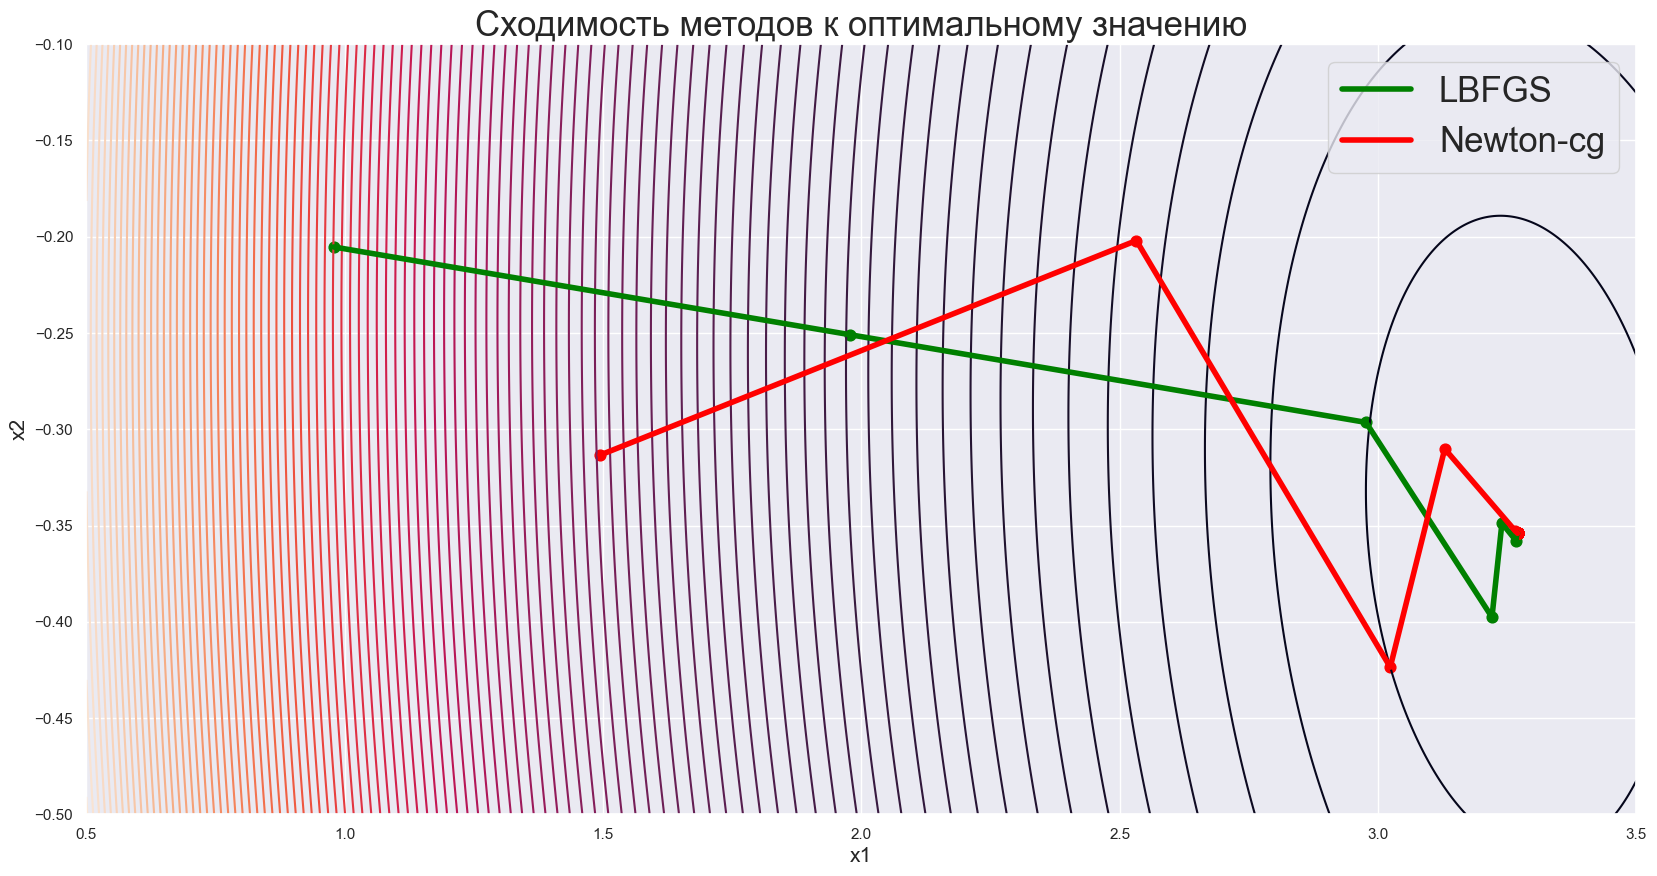

In [ ]:
sns.set(style="darkgrid")
plt.figure(figsize=(20, 10))
plt.contour(X1, X2, Z, levels=100)
plt.plot(coefs_lbfgs[:, 0], coefs_lbfgs[:, 1], color="green", linewidth=4, label="LBFGS")
plt.scatter(coefs_lbfgs[:, 0], coefs_lbfgs[:, 1], color="green", s=60)
plt.plot(coefs_nc[:, 0], coefs_nc[:, 1], color="red", linewidth=4, label="Newton-cg")
plt.scatter(coefs_nc[:, 0], coefs_nc[:, 1], color="red", s=60)
plt.legend(fontsize=25)
plt.xlabel("x1", size=15)
plt.ylabel("x2", size=15)
plt.title("Сходимость методов к оптимальному значению", size=25)
plt.show()

Рассмотрим второй пример. **Внимание**, здесь $x_2$ уже из другого распределения!

In [ ]:
np.random.seed(1)
X = np.hstack((np.random.randn(100, 1), np.random.uniform(7, 12, (100, 1))))
Y = np.random.randn(100) * 1. + X[:, 0] * 3 - X[:, 1] * 0.12
Y = np.where(Y > 0, 1, 0)

In [ ]:
clf_lbfgs = LogisticRegression(C=1, solver='lbfgs', max_iter=1, warm_start=True, fit_intercept=False)
clf_newton_cg = LogisticRegression(C=1, solver='newton-cg', max_iter=1, warm_start=True, fit_intercept=False)

coefs_lbfgs = []
coefs_nc = []

for it in range(1000):
    clf_lbfgs.fit(X, Y)
    coefs_lbfgs.append(clf_lbfgs.coef_[0])
    clf_newton_cg.fit(X, Y)
    coefs_nc.append(clf_newton_cg.coef_[0])

coefs_lbfgs = np.array(coefs_lbfgs)
coefs_nc = np.array(coefs_nc)

x1 = np.linspace(0, 3.5, 1000)
x2 = np.linspace(0.01, -0.1, 1000)
X1, X2 = np.meshgrid(x1, x2)
Z = loss(X1, X2, X, Y)

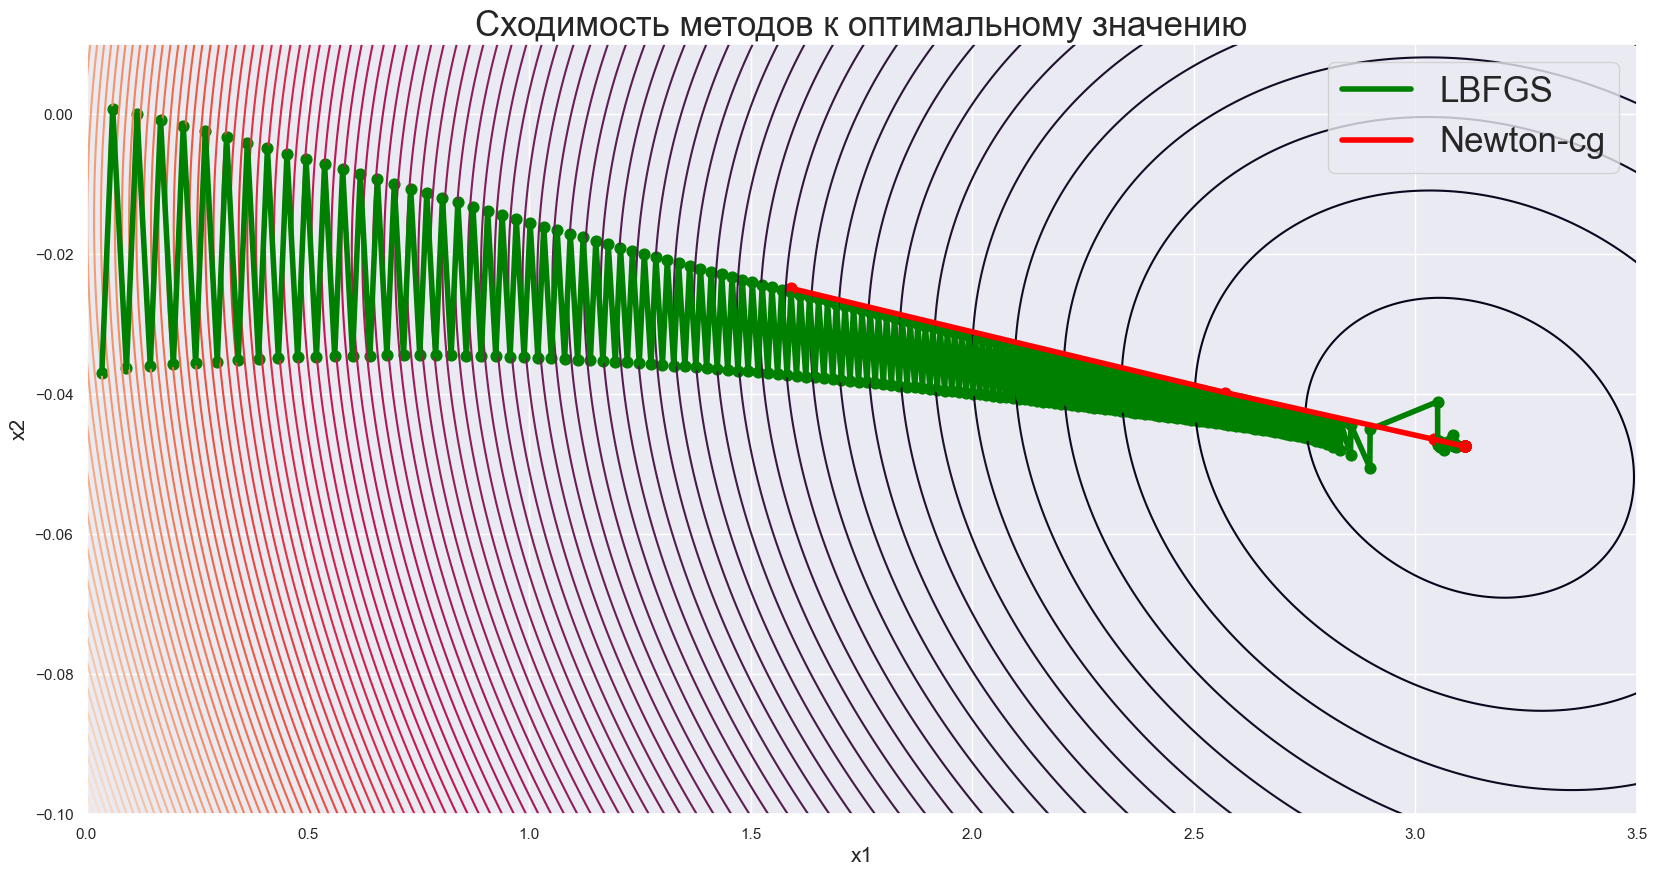

In [ ]:
sns.set(style="darkgrid")
plt.figure(figsize=(20, 10))
plt.contour(X1, X2, Z, levels=100)
plt.plot(coefs_lbfgs[:, 0], coefs_lbfgs[:, 1], color="green", linewidth=4, label="LBFGS")
plt.scatter(coefs_lbfgs[:, 0], coefs_lbfgs[:, 1], color="green", s=60)
plt.plot(coefs_nc[:, 0], coefs_nc[:, 1], color="red", linewidth=4, label="Newton-cg")
plt.scatter(coefs_nc[:, 0], coefs_nc[:, 1], color="red", s=60)
plt.legend(fontsize=25)
plt.xlabel("x1", size=15)
plt.ylabel("x2", size=15)
plt.title("Сходимость методов к оптимальному значению", size=25)
plt.show()

### **Вопрос 2** (2 балла)

Как видим, метод LBFGS плохо работает на неотмасштабированных данных. Это общее свойство всех методов первого порядка (т.е. использующих только первую производную). Ньютоновские же методы хорошо справляются с подобными ситуациями. В таком случае, почему LBFGS является методом по умолчанию, а не Newton-CG?

В отличие от ньютоновских методов, таких как Newton-CG, LBFGS не требует хранения и обращения больших матриц, что делает его более эффективным с точки зрения использования памяти, особенно для больших наборов данных.

LBFGS обычно хорошо работает для широкого диапазона задач оптимизации, в то время как ньютоновские методы могут быть чрезмерно чувствительны к настройкам гиперпараметров, таких как выбор коэффициента регуляризации.

Давайте рассмотрим ещё один модельный пример.

$x_1 \sim Uniform(0, 1)$, $x_2 \sim Uniform(0, 1)$

$y(x_1, x_2)= \begin{cases}
0, & x_1 + x_2 < 5; \\
1, & \text{иначе.}
\end{cases}$

Сгенерируем данные и выучим логистическую регрессию, визуализировав полученный результат.

In [ ]:
np.random.seed(1)
X1 = np.random.uniform(0, 5, 100)
X2 = np.random.uniform(0, 5, 100)
X = np.hstack((X1[:, None], X2[:, None]))
Y = np.where(X1 + X2 < 5, 0, 1)

In [ ]:
clf = LogisticRegression(penalty='l2')
clf.fit(X, Y)

LogisticRegression()

In [ ]:
from matplotlib.colors import ListedColormap

def plot_separating_surface(X, y, cls, view_support=False):
    x_min = min(X[:, 0]) - 0.1
    x_max = max(X[:, 0]) + 0.1
    y_min = min(X[:, 1]) - 0.1
    y_max = max(X[:, 1]) + 0.1
    h = 0.005
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                             np.arange(y_min, y_max, h))
    Z = cls.predict(np.c_[xx.ravel(), yy.ravel()])

    plt.figure(figsize=(8, 8))
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', s=40, cmap=cm_bright)
    if view_support:
        plt.scatter(X[cls.support_, 0], X[cls.support_, 1],
                    c=y[cls.support_], edgecolors='k', s=150, cmap=cm_bright)
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=cm, alpha=.3)
    plt.title("Визуализация прогнозатора", size=15)
    plt.xlabel(r'$x_1$', size=15)
    plt.ylabel(r'$x_2$', size=15)

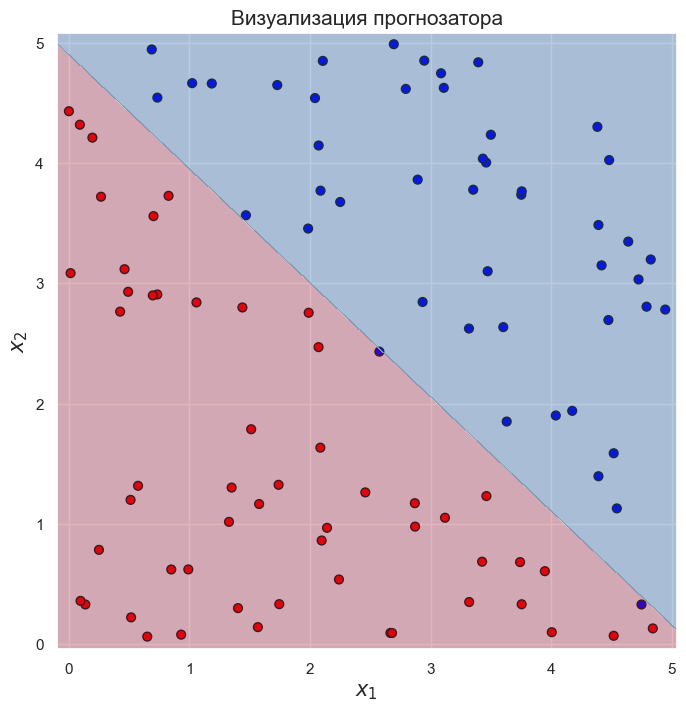

In [ ]:
plot_separating_surface(X, Y, clf)

### **Вопрос 3** (2 балла)

Придумайте, сгенерируйте и визуализируйте пример, в котором логистическая регрессия будет плохо классифицировать данные.

Как видно, данные смешаны, и линейная решающая граница не может эффективно разделить два класса.

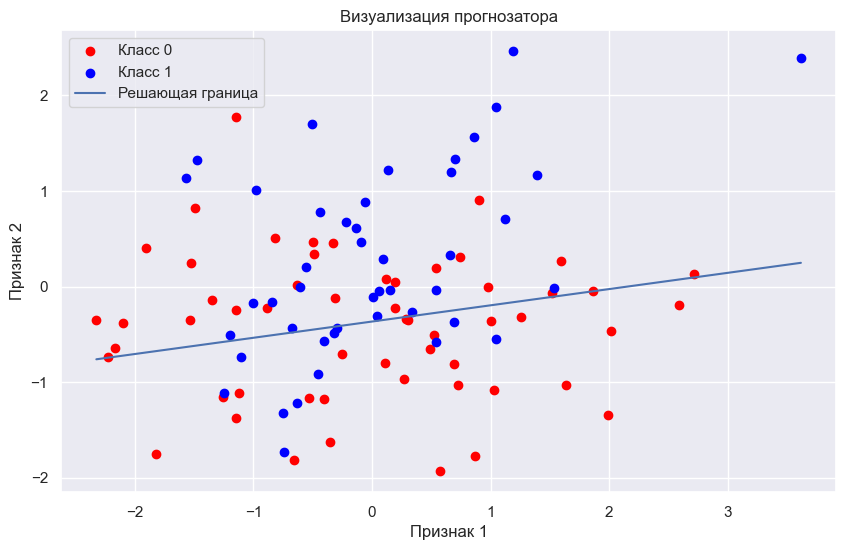

In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X, y = make_classification(n_samples=200, n_features=2, n_redundant=0,
                           n_clusters_per_class=1, flip_y=0.1, class_sep=0.5, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:, 1]

plt.figure(figsize=(10, 6))

plt.scatter(X_test_scaled[y_test == 0][:, 0], X_test_scaled[y_test == 0][:, 1], color='red', label='Класс 0')
plt.scatter(X_test_scaled[y_test == 1][:, 0], X_test_scaled[y_test == 1][:, 1], color='blue', label='Класс 1')

x_values = np.array([np.min(X_test_scaled[:, 0]), np.max(X_test_scaled[:, 0])])
y_values = -(x_values * model.coef_[0][0] + model.intercept_[0]) / model.coef_[0][1]
plt.plot(x_values, y_values, label='Решающая граница')

plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.title('Визуализация прогнозатора')
plt.legend()
plt.show()

Представьте, что в одном из наших модельных примеров произошла ошибка, данные были испорчены, и теперь у нас вместо $100$ разных сэмплов &mdash; $100$ копий одного сэмпла. Например, так.

In [ ]:
X1 = []
X2 = []

for i in range(100):
    np.random.seed(1)
    x1 = np.random.uniform(0, 5)
    x2 = np.random.uniform(0, 5)
    X1.append(x1)
    X2.append(x2)

X1 = np.array(X1)
X2 = np.array(X2)
X = np.hstack((X1[:, None], X2[:, None]))

Y = []

for i in range(100):
    p = 1 / (1 + np.exp(-(X1[i] + X2[i] - 5)))
    y = np.random.choice([0, 1], p = [1 - p, p])
    Y.append(y)

Y = np.array(Y)

### **Вопрос 4** (1 балл)

Почему в этом коде генерируется $100$ одинаковых примеров, хотя используется random?

В приведенном коде происходит инициализация генератора случайных чисел с одним и тем же начальным значением (seed) внутри цикла. Функция np.random.seed(1) устанавливает начальное состояние генератора случайных чисел, что приводит к тому, что при каждом вызове np.random.uniform(0, 5) генерируются одни и те же числа.

Поскольку seed устанавливается в 1 перед каждым генерированием $x1$ и $x2$, полученные значения будут одинаковыми для каждой итерации цикла, что приводит к 100 одинаковым сэмплам.

Чтобы генерировать разные значения, seed должен быть установлен один раз вне цикла, а не каждый раз в его начале.

-----------
<font color="white" style="opacity:0.2023"></font>

Поскольку все записи у нас идентичны, то каждому объекту обучающей выборки логистическая регрессия предскажет одинаковую вероятность принадлежности к классу $1$.

### **Вопрос 5** (2 балла)

Какую вероятность принадлежности к классу $1$ предскажет логистическая регрессия в этом случае?

***Замечание*** В качестве ответа подразумевается некий общий способ получения этого числа помимо прямого обучения логистической регрессии.

Если в обучающем наборе данных все записи идентичны, то логистическая регрессия будет предсказывать одинаковую вероятность для каждого объекта. В таком случае логистическая регрессия вырождается и не может определить значимые веса для признаков, так как отсутствует вариативность данных, которая необходима для обучения модели.

Однако, вероятность, которую предскажет логистическая регрессия для каждого объекта, будет равна отношению количества сэмплов положительного класса к общему количеству сэмплов. Это связано с тем, что в этом случае модель, скорее всего, выродится до простой гипотезы, где веса признаков будут стремиться к нулю (поскольку признаки не дают информации о целевой переменной), и предсказания будут основываться только на базовой вероятности класса.

Таким образом, если у нас есть $n$ идентичных объектов, из которых $k$ объектов принадлежат классу 1, то предсказанная вероятность принадлежности к классу 1 будет равна $\frac{k}{n}$.

-----------
<font color="white" style="opacity:0.2023"></font>

## Обучение на реальных данных

Рассмотрим набор данных от метеорологической службы одной страны. В нём требуется предсказать, будет ли дождь на следующий день.

Для начала, скачаем данные

In [ ]:
!gdown 1AgUMxgMK-eRjzthevCk9g-J_s2vpBFpe

"gdown" �� ���� ����७��� ��� ���譥�
��������, �ᯮ��塞�� �ணࠬ��� ��� ������ 䠩���.


In [ ]:
df = pd.read_csv("weatherAUS.csv")
df.head(5)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


### **Вопрос 6** (1 балл)

Что это за страна? Подсказка: жители этой страны воспользовались бы методом tail вместо head :)

Австралия

Извлечём немного информации из набора данных

In [ ]:
df.shape

(145460, 23)

In [ ]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

Внимательно приглядимся к столбцам. Напомним, что мы предсказываем значение RainTomorrow. Давайте посмотрим, на этот столбец

In [ ]:
df['RainTomorrow'].unique()

array(['No', 'Yes', nan], dtype=object)

Целевая переменная содержит неопределённые значения! Их нужно удалить из всей выборки. Также, переименуем 'Yes' и 'No' в $1$ и $0$.

In [ ]:
df = df[df['RainTomorrow'] == df['RainTomorrow']]
df['RainTomorrow'].unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
df['RainTomorrow'] = df['RainTomorrow'].map({'Yes': 1., 'No': 0.})
df['RainToday'] = df['RainToday'].map({'Yes': 1., 'No': 0.})

In [ ]:
print(df.shape)

(142193, 23)


Объектов стало чуть-чуть поменьше. Давайте выведем немного информации о них

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142193 entries, 0 to 145458
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

Как видим, у нас есть 17 признаков имеющих вещественные значения (вещественные признаки), и 5 признаков типа object (категориальные признаки). Для них требуется отдельная предобработка. Пока разобьём выборку на обучающую и тестовую.

In [ ]:
from sklearn.model_selection import train_test_split

<img src="https://img.devrant.com/devrant/rant/r_2416968_UUKQJ.jpg" width=360 height=760 />

In [ ]:
y = df.RainTomorrow
X = df.drop(columns=["RainTomorrow"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2021)

In [ ]:
X_train.shape

(99535, 22)

#### Вещественные признаки

Как вы могли заметить, среди вещественных и категориальных признаков есть пропущенные значения. В случае с вещественными признаками, пропущенные значения заполняют средним, медианой, нулём или даже пытаются предсказывать по другим признакам. Мы заполним медианой

In [ ]:
numeric_data = X_train.select_dtypes([np.number])
numeric_data_median = numeric_data.median()
numeric_features = numeric_data.columns
X_train = X_train.fillna(numeric_data_median)
X_test = X_test.fillna(numeric_data_median)

In [ ]:
len(numeric_features)

17

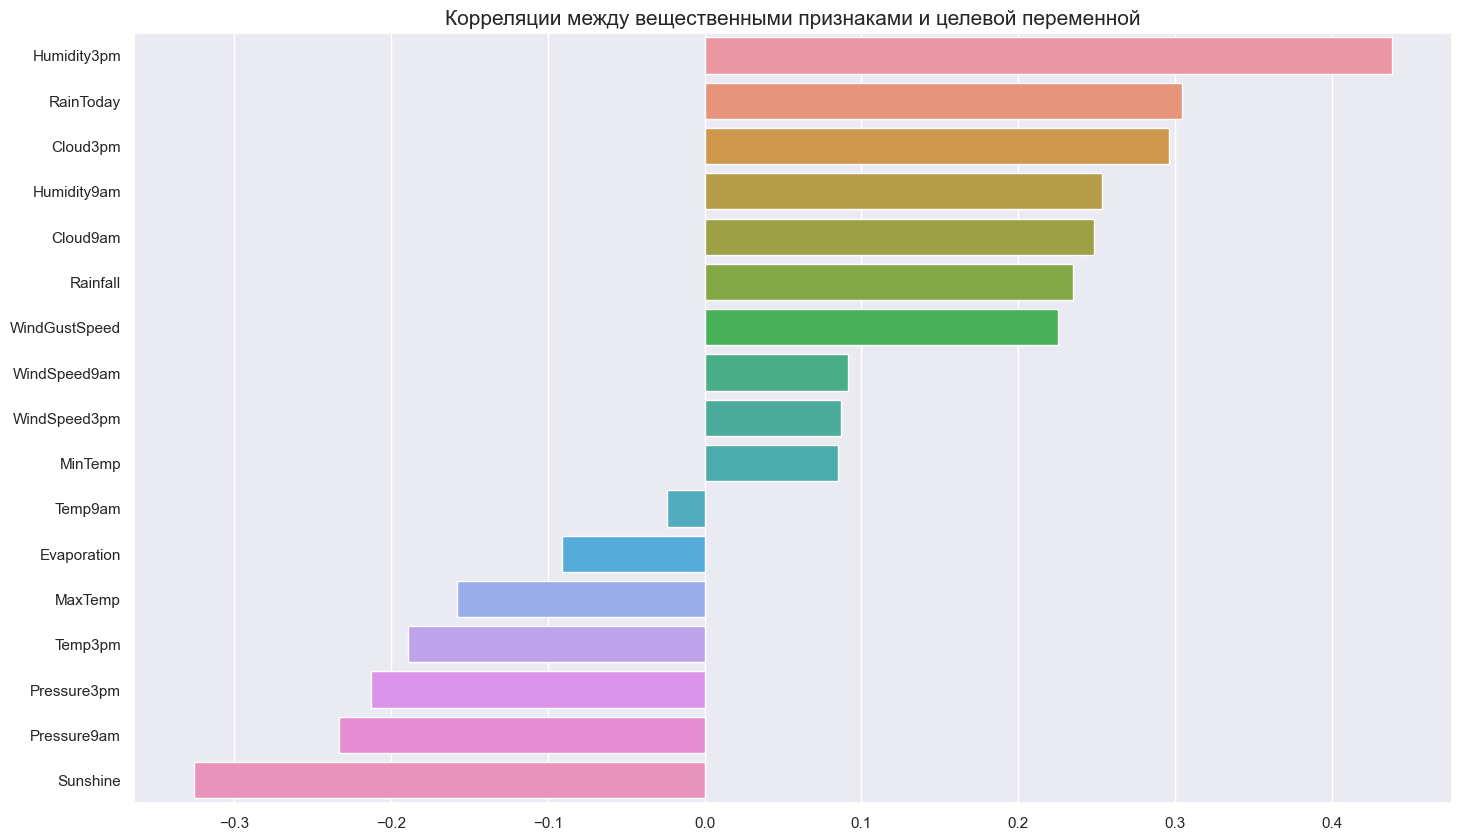

In [ ]:
correlations = X_train[numeric_features].corrwith(y_train).sort_values(ascending=False)
plot = sns.barplot(y=correlations.index, x=correlations)
plot.set_title("Корреляции между вещественными признаками и целевой переменной", size=15)
plot.figure.set_size_inches(17, 10)

### **Вопрос 7** (2 балла)

Попробуйте объяснить для каких-нибудь признаков получившиеся значения корреляции (почему для одних эти значения высокие, а для других низкие)?

Корреляция измеряет линейную связь между двумя переменными и может варьироваться от -1 до 1. Значение близкое к 1 указывает на сильную положительную связь (как правило, когда один признак увеличивается, другой тоже увеличивается), значение около -1 указывает на сильную отрицательную связь (один признак увеличивается, другой уменьшается), а значение около 0 означает отсутствие линейной связи.

Объяснение корреляций для конкретных признаков может зависеть от контекста данных. Например:

- **Высокая положительная корреляция**: Если у нас есть признак, такой как `Humidity3pm`, который показывает высокую положительную корреляцию, это может означать, что более высокая влажность в 3 часа дня имеет тенденцию соответствовать дням, когда на следующий день происходит дождь.

- **Низкая или отрицательная корреляция**: Признаки, такие как `Sunshine`, могут иметь низкую или отрицательную корреляцию, что может означать, что большее количество солнечных часов связано с меньшей вероятностью дождя на следующий день.

Дополнительно визуализируем признаки Sunshine и Humidity3pm. Библиотека seaborn предоставляет график swarmplot, который в отличие от scatterplot старается разместить на графике как можно больше точек, так чтобы они не пересекались, уложившись при этом в заданную ширину.

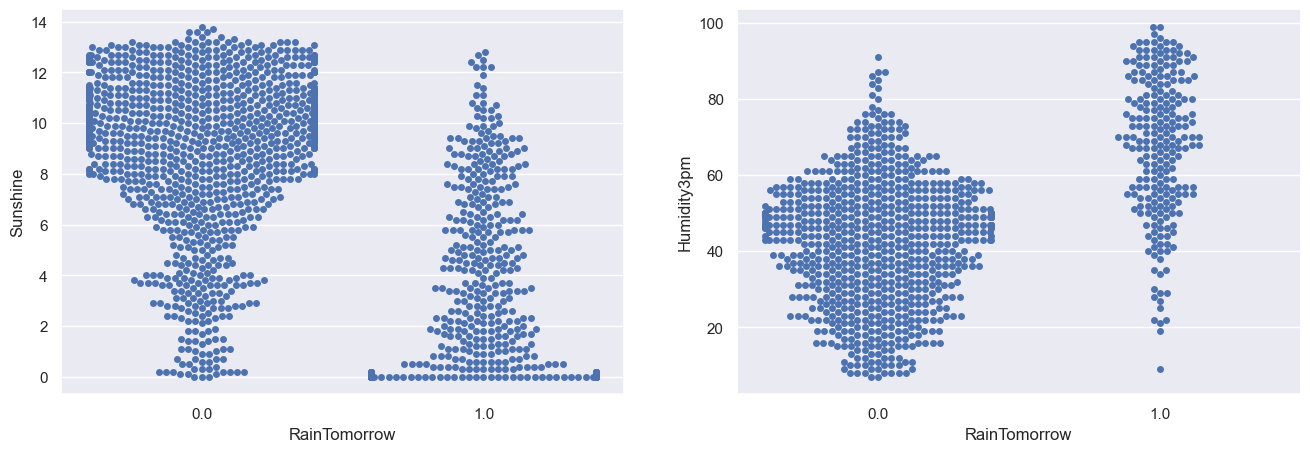

In [ ]:
fig, axs = plt.subplots(figsize=(16, 5), nrows=1, ncols=2)
_ = sns.swarmplot(x="RainTomorrow", y="Sunshine", data=df.head(10000), ax=axs[0])
_ = sns.swarmplot(x="RainTomorrow", y="Humidity3pm", data=df.head(1000), ax=axs[1])

Для оценки качества классификации воспользуемся реализованными в sklearn logloss и ROC AUC. ROC AUC является метрикой по умолчанию для бинарной классификации, поскольку очень устойчива к несбалансированности классов. Подробнее про неё можно прочитать https://alexanderdyakonov.wordpress.com/2017/07/28/auc-roc-площадь-под-кривой-ошибок/ . Обучим  логистическую регрессию на вещественных признаках, не подбирая константу регуляризации

In [ ]:
from sklearn.metrics import log_loss, roc_auc_score

In [ ]:
model = LogisticRegression(solver='lbfgs', max_iter=1000)
model.fit(X_train[numeric_features], y_train)

LogisticRegression(max_iter=1000)

In [ ]:
y_pred = model.predict_proba(X_test[numeric_features])[:, 1]
y_train_pred = model.predict_proba(X_train[numeric_features])[:, 1]

print("Test logloss = %.4f" % log_loss(y_test, y_pred))
print("Train logloss = %.4f" % log_loss(y_train, y_train_pred))
print("Test roc auc score = %.4f" % roc_auc_score(y_test, y_pred))
print("Train roc auc score = %.4f" % roc_auc_score(y_train, y_train_pred))

Test logloss = 0.3650
Train logloss = 0.3689
Test roc auc score = 0.8589
Train roc auc score = 0.8571


### **Вопрос 8** (2 балла)

Сколько итераций понадобилось для обучения логистической регрессии?

***Ваш ответ***

In [ ]:
model.n_iter_[0]

626

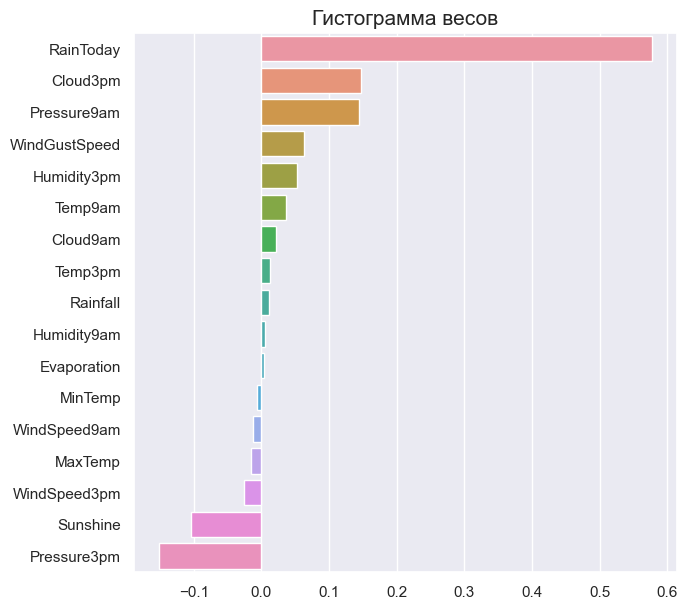

In [ ]:
plt.figure(figsize=(7, 7))
sorted_weights = sorted(zip(model.coef_[0], numeric_features), reverse=True)
weights = [x[0] for x in sorted_weights]
features = [x[1] for x in sorted_weights]
_ = sns.barplot(y=features, x=weights).set_title("Гистограмма весов", size=15)

Если приглядеться к весам, то можно увидеть, что между корреляциями признаков с целевой переменной и значением соответствующих весов мало общего. Чтобы это предотвратить, будем масштабировать наши признаки перед обучением модели. Это, среди, прочего, сделает нашу регуляризацию более честной: теперь все признаки будут регуляризоваться в равной степени.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[numeric_features])
X_test_scaled = scaler.transform(X_test[numeric_features])

In [ ]:
model = LogisticRegression(solver='lbfgs', max_iter=1000)
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

### **Вопрос 9** (2 балла)

А сколько итераций потребовалось теперь? Как это связано с модельными примерами, на которых мы разбирали разные методы оптимизации?

***Ваш ответ***

In [ ]:
model.n_iter_[0]

33

Как уже было установлено в начале задания, LBFGS плохо сходится на данных, которые не были отмасштабированны. Поэтому количество итераций сильно отличается

In [ ]:
y_pred = model.predict_proba(X_test_scaled)[:, 1]
y_train_pred = model.predict_proba(X_train_scaled)[:, 1]

print("Test logloss = %.4f" % log_loss(y_test, y_pred))
print("Train logloss = %.4f" % log_loss(y_train, y_train_pred))
print("Test roc auc score = %.4f" % roc_auc_score(y_test, y_pred))
print("Train roc auc score = %.4f" % roc_auc_score(y_train, y_train_pred))

Test logloss = 0.3592
Train logloss = 0.3636
Test roc auc score = 0.8646
Train roc auc score = 0.8625


### **Вопрос 10** (2 балла)

Сравните получившееся качество с качеством до нормализации. Объясните, почему оно изменилось, хотя мы применяли линейную модель к линейно преобразованным признакам? Могло ли качество измениться в другую сторону?

Масштабирование признаков может улучшить процесс оптимизации, так как градиентный спуск будет работать более эффективно на данных, где все признаки имеют схожий масштаб. Это может привести к более точному нахождению минимума функции потерь.

Без масштабирования признаки с большими абсолютными значениями могут оказывать более сильное влияние на значения весов, даже если они не являются более информативными.

Хотя мы применяем линейную модель к линейно преобразованным признакам, и теоретически это не должно влиять на предсказательную способность модели, на практике результаты могут измениться по следующим причинам:

- Влияние численной стабильности и точности вычислений на процесс оптимизации.
- Различия в результате итеративного алгоритма градиентного спуска, который может сходиться к разным локальным минимумам в зависимости от начального масштаба признаков.

Могло ли качество измениться в другую сторону? Да, возможно, если бы данные были неправильно масштабированы или если бы масштабирование привело к потере важной информации о структуре данных (например, если в данных были важные порядковые отношения, которые были нарушены масштабированием).

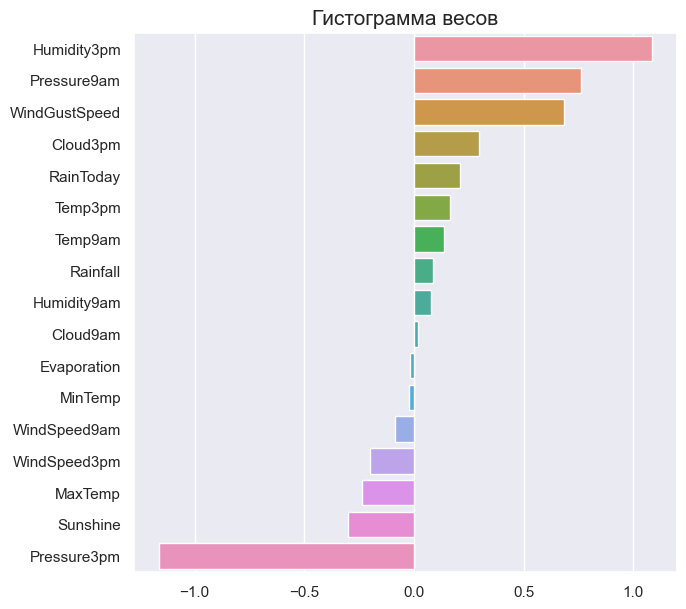

In [ ]:
plt.figure(figsize=(7, 7))
sorted_weights = sorted(zip(model.coef_[0], numeric_features), reverse=True)
weights = [x[0] for x in sorted_weights]
features = [x[1] for x in sorted_weights]
_ = sns.barplot(y=features, x=weights).set_title("Гистограмма весов", size=15)

### **Вопрос 11** (2 балла)

Почему даже после нормализации график не до конца похож на гистограмму корреляций?

График весов модели логистической регрессии и график корреляций между признаками и целевой переменной могут не совпадать по нескольким причинам:

1. Корреляция между признаком и целевой переменной не обязательно означает причинно-следственную связь. Веса в логистической регрессии отражают вклад каждого признака в логарифмические шансы целевой переменной, с учетом других признаков.

2. Если в данных присутствует мультиколлинеарность, это может повлиять на веса в логистической регрессии, в то время как корреляции рассматривают каждый признак индивидуально.

3. Логистическая регрессия учитывает взаимодействие между признаками. Вес признака в модели может быть изменен из-за влияния других признаков.

Наряду с параметрами (веса $w$, $w_0$), которые модель оптимизирует на этапе обучения, у модели есть и гиперпараметры. У нашей модели это alpha — коэффициент регуляризации. Подбирают его обычно по сетке, измеряя качество на валидационной (не тестовой) выборке или с помощью кросс-валидации. Посмотрим, как это можно сделать (заметьте, что мы перебираем alpha по логарифмической сетке, чтобы узнать оптимальный порядок величины).

### **Вопрос 12** (2 балла)
Чем отличаются валидационная и тестовая выборки?

Валидационная выборка используется для настройки гиперпараметров модели и оценки модели в процессе разработки, в то время как тестовая используется для окончательной оценки производительности модели после завершения всех настроек и выбора модели


Best C = 38.8816


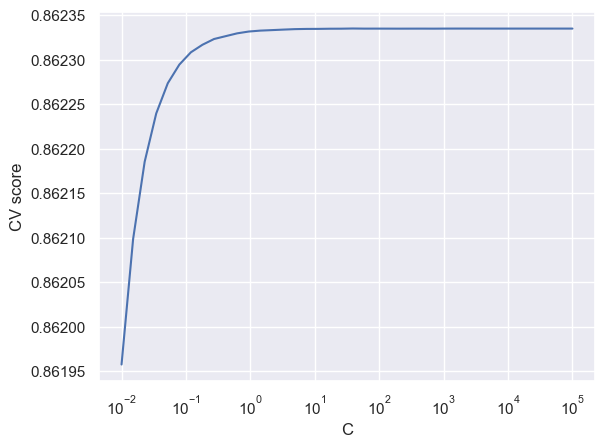

In [ ]:
from sklearn.model_selection import GridSearchCV

C = np.logspace(-2, 5, 40)
searcher = GridSearchCV(LogisticRegression(solver='lbfgs'), [{"C": C}], scoring="roc_auc", cv=10)
searcher.fit(X_train_scaled, y_train)

best_C = searcher.best_params_["C"]

print("Best C = %.4f" % best_C)

_ = plt.plot(C, searcher.cv_results_["mean_test_score"])
plt.xscale("log")
plt.xlabel("C")
plt.ylabel("CV score")
plt.show()

### **Вопрос 13** (2 балла)

Почему с ростом $C$ качество не падает, хотя модель должна недообучаться?

***Подсказка***: Внимательно прочитайте документацию к реализации логистической регрессии в sklearn

В документации к `scikit-learn` упоминается, что для логистической регрессии регуляризация осуществляется обратно пропорционально $C$. Это означает, что с увеличением $C$ регуляризация ослабевает, что может давать модели больше "свободы" для подгонки под данные, но без дополнительного риска переобучения.

К тому же логистическая регрессия является относительно простой моделью, особенно если признаков не очень много. В таких условиях, модель может не достичь состояния переобучения так же легко, как более сложные модели.

### **Вопрос 14** (1 балл)

Почему мы не подбираем коэффициент регуляризации по обучающей выборке? По тестовой выборке?

Подбор коэффициента регуляризации непосредственно на обучающей выборке может привести к переобучению. В этом случае модель будет оптимизирована для конкретных обучающих данных, но может плохо работать на новых данных, так как коэффициент будет выбран таким образом, чтобы минимизировать ошибку на обучающем наборе, а не для улучшения способности модели к обобщению.

Тестовая выборка предназначена для финальной оценки модели и должна оставаться "невидимой" для модели до самого конца процесса обучения и валидации. Если использовать тестовую выборку для подбора гиперпараметров, в том числе коэффициента регуляризации, это приведет к "утечке информации" и модель "подглядит" тестовые данные, что снова приведет к переобучению — на этот раз к тестовым данным.

Попробуем обучить модель с подобранным коэффициентом регуляризации. Заодно воспользуемся удобным классом Pipeline: обучение модели часто представляется как последовательность некоторых действий с обучающей и тестовой выборками (например, сначала нужно отмасштабировать выборку (причем для обучающей выборки нужно применить метод fit, а для тестовой — transform), а затем обучить/применить модель (для обучающей fit, а для тестовой — predict). Pipeline позволяет хранить эту последовательность шагов и корректно обрабатывает разные типы выборок: и обучающую, и тестовую. Однако, если ваши модели не укладываются в использование простых fit, transform и predict, то этот класс вам не подойдёт

In [ ]:
from sklearn.pipeline import Pipeline

simple_pipeline = Pipeline([
    ('scaling', StandardScaler()),
    ('classification', LogisticRegression(solver='lbfgs', C=best_C))
])

model = simple_pipeline.fit(X_train[numeric_features], y_train)
y_pred = model.predict_proba(X_test[numeric_features])[:, 1]
print("Test logloss = %.4f" % log_loss(y_test, y_pred))
print("Test roc auc score = %.4f" % roc_auc_score(y_test, y_pred))

Test logloss = 0.3592
Test roc auc score = 0.8646


### **Вопрос 15** (2 балла)

Почему качество не выросло?

По графику выше (перед 13 вопросом) видно, что уже со значения $С = 1.0$ качество модели не менялось значительно (если быть точным, то разница наблюдается только с 5-го знака после запятой).

Как можем наблюдать по уже упомянутому графику и показателям в коде ниже, метрики, такие как logloss и ROC AUC, могут иметь практические пределы, до которых они могут быть улучшены в данной задаче. Для простых моделей, таких как логистическая регрессия, может существовать верхний порог производительности, который ограничивается структурой данных и самим алгоритмом.

In [ ]:
model_1 = LogisticRegression(solver='lbfgs', max_iter=1000)
model_1.fit(X_train_scaled, y_train)
y_pred = model_1.predict_proba(X_test_scaled)[:, 1]
y_train_pred = model_1.predict_proba(X_train_scaled)[:, 1]

print("Test logloss = %.6f" % log_loss(y_test, y_pred))
print("Test roc auc score = %.6f" % roc_auc_score(y_test, y_pred))

print("Значение C без подбора по GridSearch:", model_1.C)

simple_pipeline = Pipeline([
    ('scaling', StandardScaler()),
    ('classification', LogisticRegression(solver='lbfgs', C=best_C))
])

model_2 = simple_pipeline.fit(X_train[numeric_features], y_train)
y_pred = model_2.predict_proba(X_test[numeric_features])[:, 1]
print("Test logloss = %.6f" % log_loss(y_test, y_pred))
print("Test roc auc score = %.6f" % roc_auc_score(y_test, y_pred))

print("Значение C, найденное с помощью GridSearch:", model_2.named_steps['classification'].C)

Test logloss = 0.359217
Test roc auc score = 0.864589
Значение C без подбора по GridSearch: 1.0
Test logloss = 0.359215
Test roc auc score = 0.864593
Значение C, найденное с помощью GridSearch: 38.881551803080896


Рассмотрим теперь категориальные признаки. Сразу отметим, что признак "Date" очень опасен, и лучше пока его выкинуть. Это связано с тем, что мы можем получить прямую информацию о том, будет ли завтра дождь, если текущее место и завтрашняя дата встречались где-то в обучающей выборке. Очень часто также встречаются признак наподобие "ID", которые могут содержать аналогичные утечки информации. С такими признаками всегда нужно обращаться осторожно!

In [ ]:
categorical = list(X_train.drop(columns=["Date"]).dtypes[X_train.dtypes == "object"].index)
X_train[categorical] = X_train[categorical].fillna("NotGiven")
X_test[categorical] = X_test[categorical].fillna("NotGiven")

Для работы с категориальными признаками нужно их как-то закодировать числами. Для этого нам понадобится заранее реализованный class MyOneHotEncoder. Вообще OneHotEncoding &mdash; самая стандартная процедура для кодирования категориальных признаков. Помимо библиотеки sklearn, встроенный OneHotEncoder есть в библиотеке pandas и называется get_dummies. Однако сегодня мы не будем пользоваться библиотечными методами:)

Если последующий код выполнятеся слишком медленно, то вероятно Вы реализовали MyOneHotEncoder без использования векторных операций из библиотеки numpy.

In [ ]:
from sklearn.compose import ColumnTransformer

column_transformer = ColumnTransformer([
    ('ohe', MyOneHotEncoder(), categorical),
    ('scaling', StandardScaler(), numeric_features)
])

pipeline = Pipeline(steps=[
    ('ohe', column_transformer),
    ('classification', LogisticRegression(solver='lbfgs', max_iter=200))
])

model = pipeline.fit(X_train.drop(columns=["Date"]), y_train)
y_pred = model.predict_proba(X_test.drop(columns=["Date"]))[:, 1]
print("Test logloss = %.4f" % log_loss(y_test, y_pred))
print("Test roc auc score = %.4f" % roc_auc_score(y_test, y_pred))

Test logloss = 0.3516
Test roc auc score = 0.8700


Качество немного выросло, если смотреть на ROC AUC!

Давайте попробуем счётчики.

Напомним, что счётчики преобразуют категориальный признак в три значения:

1. Доля counts объектов в обучающей выборке с таким же значением признака. $$\begin{align}
successes_j(c) = \frac{1}{n} \sum_{i=1}^n [f_j(x_i) = c]
\end{align}$$
2. Доля successes объектов первого класса ($y = 1$) в обучающей выборке с таким же значением признака. $$\begin{align}
counts_j(c) = \frac{1}{n * counts_j(c)} \sum_{i=1}^n[f_j(x_i) = c][y_i = +1].
\end{align}$$
2. Сглаженное отношение двух предыдущих величин: $$\begin{align}
p_j(c) = \frac{successes_j(c) + a}{counts_j(c) + b},
\end{align}$$

**Обратите внимание!** Если Ваша реализация счётчиков работает очень долго, то вероятнее всего, Вы плохо векторизовали код. Попробуйте использовать np.vectorize

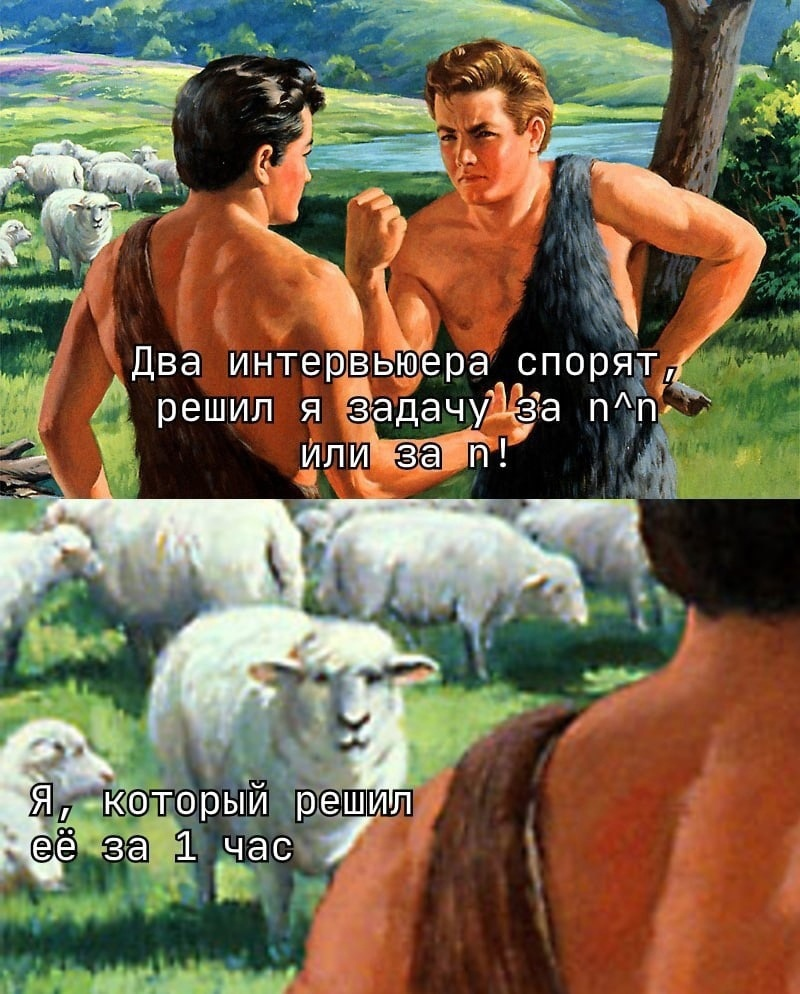

In [ ]:
scal = StandardScaler()

enc_train = FoldCounters()
enc_train.fit(X_train[categorical], y_train)
X_train_counters = enc_train.transform(X_train[categorical])

enc_test = SimpleCounterEncoder()
enc_test.fit(X_train[categorical], y_train)
X_test_counters = enc_test.transform(X_test[categorical])

X_train_preprocessed = scal.fit_transform(np.hstack((X_train[numeric_features].to_numpy(), X_train_counters)))
X_test_preprocessed = scal.transform(np.hstack((X_test[numeric_features].to_numpy(), X_test_counters)))

model = LogisticRegression(solver="lbfgs")
model.fit(X_train_preprocessed, y_train)

y_pred = model.predict_proba(X_test_preprocessed)[:, 1]
print("Test logloss = %.4f" % log_loss(y_test, y_pred))
print("Test roc auc score = %.4f" % roc_auc_score(y_test, y_pred))

Test logloss = 0.3573
Test roc auc score = 0.8665


### **Вопрос 16** (2 балла)

Счётчики показывают худшее качество по AUC ROC, нежели OneHotEncoding. В чём же преимущества счётчиков?

Этот метод может иметь несколько преимуществ по сравнению с OneHotEncoding:

1. OneHotEncoding приводит к значительному увеличению числа признаков, особенно когда категориальные переменные имеют много уровней. Счетчики могут уменьшить количество признаков, поскольку для каждой категориальной переменной создается только один признак, что упрощает модель и ускоряет её обучение.

3. OneHotEncoding приводит к созданию разреженных матриц, которые могут быть неэффективными в вычислительном отношении. Счетчики же создают плотный набор признаков.

4. OneHotEncoding может привести к переобучению, если есть категории с очень маленьким числом наблюдений. Счетчики могут обеспечить лучшее обобщение, используя статистику на основе целевой переменной.

**Выводы** Во второй части задания по линейным моделям мы должны были узнать:
.

1.   Зачем нужно нормализовать данные.
2.   Как работать с вещественными и категориальными признаками.
3.   Как интерпретировать результат обучения линейной модели, опираясь на описание обучающих данных

-----------
<font color="white" style="opacity:0.2023"></font>

### Бонусное задание (2 балла)

Вставьте мем или красивую картинку связанные с чем-то из:


1.   Страна, данные о которой мы анализировали
2.   Линейные модели
3.   Погода
4.   Динозавры

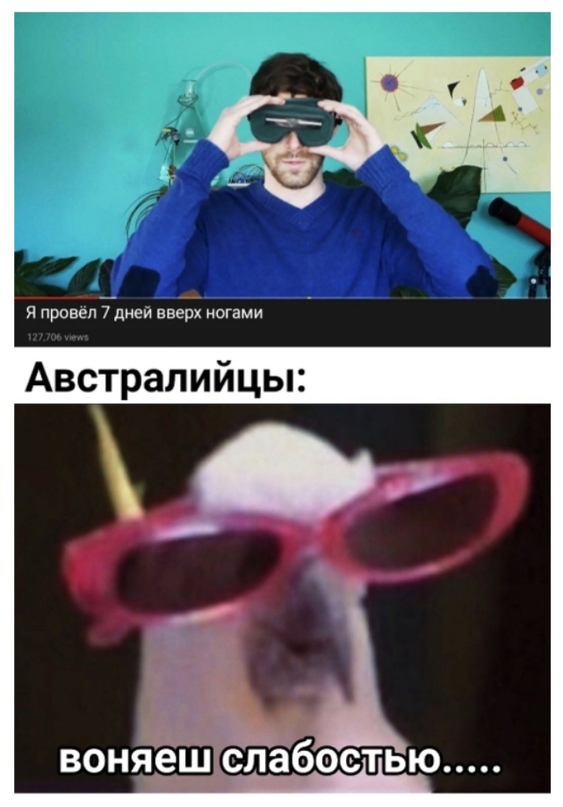